# EDA

### Before we start I have to mention how the dataset we will be working on was created. Since the first dataset was too big I decided to reduce it by 60%, unfortunately my PC was still not able to process such large files at the right pace so I decided to reduce it by another 50% by deleting every second line.


In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load the uploaded CSV file and isplay the first few rows of the dataset

In [ ]:
import pandas as pd

file_path = 'removedHalf.csv'
data = pd.read_csv(file_path)
data.head()


,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{8F231FDE-0CA2-4BCF-A466-03E4346734CB},199950,2013-12-13 00:00,T,Y,F,ANDOVER,TEST VALLEY,HAMPSHIRE,A,A
1,{782165FB-4479-4F30-97C7-03E44B2062FD},76000,2013-08-02 00:00,T,N,F,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,A,A
2,{1F985104-2481-4DA8-86C5-03E462DF4DFB},200000,2013-09-20 00:00,S,N,F,CANTERBURY,DOVER,KENT,A,A
3,{604F92F3-6834-4451-B6B2-0E9CD895482C},125000,2013-08-30 00:00,F,N,L,MINEHEAD,WEST SOMERSET,SOMERSET,A,A
4,{C4A17250-136D-440B-BB70-07784089DCEB},135000,2013-12-06 00:00,T,N,L,CANTERBURY,CANTERBURY,KENT,A,A


Rename columns: remove spaces and make them lowercase and display them

In [ ]:

data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns


Index(['transaction_unique_identifier', 'price', 'date_of_transfer',
       'property_type', 'old/new', 'duration', 'town/city', 'district',
       'county', 'ppdcategory_type', 'record_status_-_monthly_file_only'],
      dtype='object')

Visualizing outliers for price column

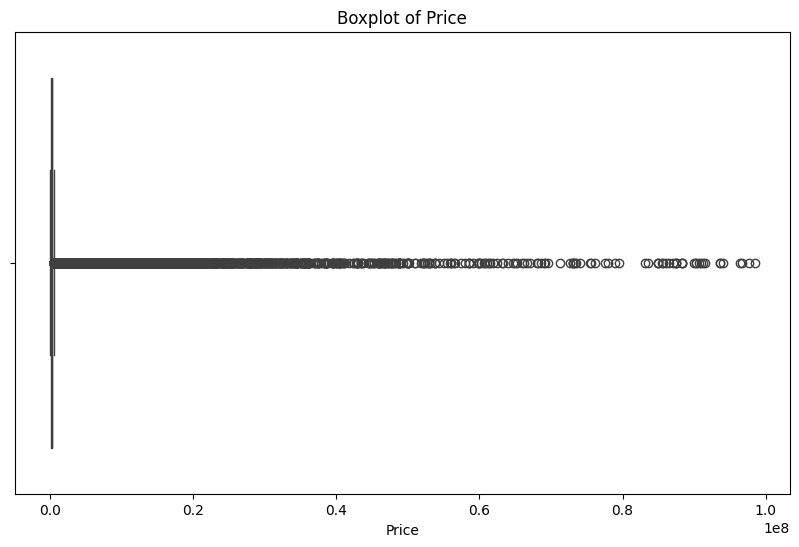

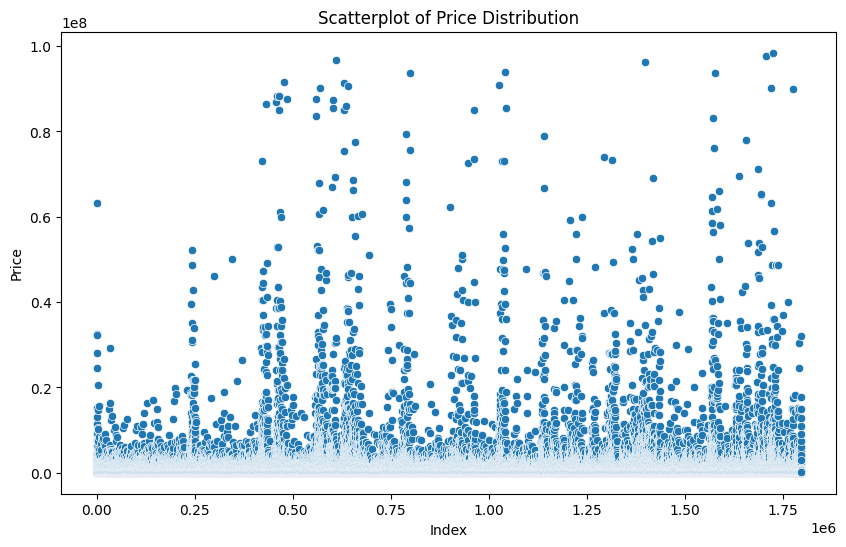

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

price_data = data['price']

price_description = price_data.describe()

plt.figure(figsize=(10, 6))
sns.boxplot(x=price_data)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Identifying outliers using the IQR method
Q1 = price_description['25%']
Q3 = price_description['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(price_data < lower_bound) | (price_data > upper_bound)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=range(len(data['price'])), y='price')
plt.title('Scatterplot of Price Distribution')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()


 Remove outliers from the dataset

In [ ]:

Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(price_data >= lower_bound) & (price_data <= upper_bound)]


Dropping not needed columns

In [193]:
data.drop(columns = 'transaction_unique_identifier', axis = 1, inplace = True)
data.drop(columns = 'duration', axis = 1, inplace = True)
data.drop(columns = 'ppdcategory_type', axis = 1, inplace = True)
data.drop(columns = 'record_status_-_monthly_file_only', axis = 1, inplace = True)

data.head()

,price,date_of_transfer,property_type,old/new,town/city,district,county
0,199950,2013-12-13 00:00,T,Y,ANDOVER,TEST VALLEY,HAMPSHIRE
1,76000,2013-08-02 00:00,T,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE
2,200000,2013-09-20 00:00,S,N,CANTERBURY,DOVER,KENT
3,125000,2013-08-30 00:00,F,N,MINEHEAD,WEST SOMERSET,SOMERSET
4,135000,2013-12-06 00:00,T,N,CANTERBURY,CANTERBURY,KENT


In [ ]:
# Correcting the column name to match the actual column in the dataset
data['date_of_transfer'] = data['date_of_transfer'].str.split(' ').str[0]

# Display the first few rows to confirm the changes
data['date_of_transfer'].head()


0    2013-12-13
1    2013-08-02
2    2013-09-20
3    2013-08-30
4    2013-12-06
Name: date_of_transfer, dtype: object

In [195]:
data.head()

,price,date_of_transfer,property_type,old/new,town/city,district,county
0,199950,2013-12-13,T,Y,ANDOVER,TEST VALLEY,HAMPSHIRE
1,76000,2013-08-02,T,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE
2,200000,2013-09-20,S,N,CANTERBURY,DOVER,KENT
3,125000,2013-08-30,F,N,MINEHEAD,WEST SOMERSET,SOMERSET
4,135000,2013-12-06,T,N,CANTERBURY,CANTERBURY,KENT


Extracting the year month and day from the 'Date of Transfer' column and create a new columns

In [ ]:
data['year'] = pd.to_datetime(data['date_of_transfer']).dt.year
data['month'] = pd.to_datetime(data['date_of_transfer']).dt.month
data['day'] = pd.to_datetime(data['date_of_transfer']).dt.day

data[['date_of_transfer', 'year']].head()
data[['date_of_transfer', 'month']].head()
data[['date_of_transfer', 'day']].head()

data.drop(columns = 'date_of_transfer', axis = 1, inplace = True)

data.head()

,price,property_type,old/new,town/city,district,county,year,month,day
0,199950,T,Y,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13
1,76000,T,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2
2,200000,S,N,CANTERBURY,DOVER,KENT,2013,9,20
3,125000,F,N,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30
4,135000,T,N,CANTERBURY,CANTERBURY,KENT,2013,12,6


In [197]:
data.head()

,price,property_type,old/new,town/city,district,county,year,month,day
0,199950,T,Y,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13
1,76000,T,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2
2,200000,S,N,CANTERBURY,DOVER,KENT,2013,9,20
3,125000,F,N,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30
4,135000,T,N,CANTERBURY,CANTERBURY,KENT,2013,12,6


Checking for null values in each column

In [ ]:
null_summary = data.isnull().sum()
print("Null Values Count per Column:")
print(null_summary)



Null Values Count per Column:
price            0
property_type    0
old/new          0
town/city        0
district         0
county           0
year             0
month            0
day              0
dtype: int64


In [199]:
data.groupby('year')['price'].median()

year
2013    178000.0
2014    183000.0
2015    192500.0
2016    200000.0
2017    200000.0
Name: price, dtype: float64

In [200]:
property_types = ("T", "S", "D", "F")
enc_df = pd.DataFrame(data, columns = ['property_type'])

dum_df = pd.get_dummies(data, columns = ["property_type"], prefix = ["property_type_is_"] )

data = enc_df.join(dum_df)

data.drop(columns = 'property_type', axis = 1, inplace = True)

data

,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,199950,Y,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13,False,False,False,False,True
1,76000,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2,False,False,False,False,True
2,200000,N,CANTERBURY,DOVER,KENT,2013,9,20,False,False,False,True,False
3,125000,N,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30,False,True,False,False,False
4,135000,N,CANTERBURY,CANTERBURY,KENT,2013,12,6,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795961,50000,N,DEWSBURY,KIRKLEES,WEST YORKSHIRE,2017,3,9,False,False,False,False,True
1795962,172000,N,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,2017,3,15,False,False,False,True,False
1795964,449950,N,LEEDS,LEEDS,WEST YORKSHIRE,2017,1,27,False,False,False,True,False
1795965,73000,N,BRADFORD,BRADFORD,WEST YORKSHIRE,2017,3,13,False,False,False,True,False


Converting boolean columns True/False to 1/0 for all 'property_type_is_' columns

In [ ]:
property_columns = [col for col in data.columns if col.startswith('property_type_is_')]
data[property_columns] = data[property_columns].astype(int)
data.head()


,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,199950,Y,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13,0,0,0,0,1
1,76000,N,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2,0,0,0,0,1
2,200000,N,CANTERBURY,DOVER,KENT,2013,9,20,0,0,0,1,0
3,125000,N,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30,0,1,0,0,0
4,135000,N,CANTERBURY,CANTERBURY,KENT,2013,12,6,0,0,0,0,1


Converting boolean columns N/O to 1/0 for old/new column

In [202]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data['old/new'])

data['old/new'] = encoder.transform(data['old/new'])

data.head()


,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,199950,1,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13,0,0,0,0,1
1,76000,0,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2,0,0,0,0,1
2,200000,0,CANTERBURY,DOVER,KENT,2013,9,20,0,0,0,1,0
3,125000,0,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30,0,1,0,0,0
4,135000,0,CANTERBURY,CANTERBURY,KENT,2013,12,6,0,0,0,0,1


In [203]:
data.columns

Index(['price', 'old/new', 'town/city', 'district', 'county', 'year', 'month',
       'day', 'property_type_is__D', 'property_type_is__F',
       'property_type_is__O', 'property_type_is__S', 'property_type_is__T'],
      dtype='object')

Save the dataset to a new CSV file

In [ ]:
output_file_path = 'clean_output.csv'
data.to_csv(output_file_path, index=False)

output_file_path


'clean_output.csv'